<a href="https://colab.research.google.com/github/Meziani160/DataMining_and_MachineLearning/blob/master/assignment_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Assignment questions 1 to 3

> Topics Covered: Data Cleaning, Exploratory Data Analysis, Visualization and Regression 

**Due: Oct 23 @23.59 (Lausanne Time)**


This assignment is the opportunity to apply the different concepts seen in class so far to a new dataset on the life expectancy.

Run the first few cells to load the dataset and then get started with the questions! **Pay attention:** in order to start working, open the notebook in Colab, and make sure to make a copy of the notebook in your private Google Drive. After you finished, export the notebook as a .ipynb file and upload it on Moodle (Section "Assignment").

To complete the assignment you have to do ***both***:

1. Complete the exercises and submit your Python notebook
2. Answer the questions to the quiz on Moodle
>Note: You can only complete the quiz one time. Have your notebook with the answers ready for answering the quiz. The quiz will be made available Monday 10th October at 7p.m.

Only the quiz questions accounts for your grade. Nevertheless, the answers to the quiz should be supported by your code in the notebook. If they are not, you will not receive points for them. 

**IMPORTANT!** You can discuss the questions with other students but **do not exchange code!** This is individual work. We will run your code and check for similarities. In case of high similarity scores between two notebooks, both the authors will get 0 points for the assignment.

You can post your questions in slack channel #assignments.


If there is need for further clarifications on the questions, after the assignment is released, we will update the file on GitHub, so make sure you check the git repo of the class for updates.

Good luck!

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/Assignment/Assignment_Q1_to_Q3_2022/Assignment_Q1_to_Q3_2022.ipynb)






In [64]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [65]:
# Load the data
df = pd.read_csv("Life Expectancy Data.csv")

For this assignment, we use data gathered by the WHO (World Health Organization) regarding many countries, over several years. The dataset includes information on items purchased from this store, including for each item or article:
* **Country**
* **Year**: year of the measurement
* **Status**: Developed or Developing status
* **Life expectancy**: Life Expectancy in years
* **Adult Mortality**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* **Alcohol**: Alcohol, recorded per capita (individuals aged 15+) consumption (in litres of pure alcohol)
* **Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* **Measles**: Measles - number of reported cases per 1000 population
* **BMI**: Average Body Mass Index of entire population
* **under-five deaths**: Number of under-five deaths per 1000 population
* **Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%)
* **Total expenditure**: General government expenditure on health as a percentage of total government expenditure (%)
* **Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* **HIV/AIDS**: Deaths per 1 000 live births HIV/AIDS (0-4 years)
* **GDP**: Gross Domestic Product per capita (in USD)
* **Population**: Population of the country
* **thinness 1-19 years**: Proportion of thinness among children and adolescents for Age 10 to 19 (in %)
* **thinness 5-9 years**: Proportion of thinness among children for Age 5 to 9 (in %)
* **Income composition of resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* **Schooling**: Number of years of schooling

## 1. Understand and Clean the Dataset
### 1.1 Initial exploration

>1.1.1 Show the first 5 or 10 rows to get an idea of the data. 

In [66]:
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


>1.1.2 How many observations (rows) and columns are in the dataset?

In [67]:
df.shape

(2938, 22)

> 1.1.3 For which variable(s), if any, are there missing/null values?

In [68]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

there are 14 features concerned

>1.1.4 Apply two small modifications to the names of the columns, that will help you avoid errors. 
* Remove spaces from beginning and end of the names of the features, if they have some
* Put all the feature names start with an uppercase letter or all with a lowercase letter

In [69]:
df.columns=df.columns.str.replace(' ','')
df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [70]:
df.columns=df.columns.str.lower()
df.head()

,country,year,status,lifeexpectancy,adultmortality,infantdeaths,alcohol,percentageexpenditure,hepatitisb,measles,...,polio,totalexpenditure,diphtheria,hiv/aids,gdp,population,thinness1-19years,thinness5-9years,incomecompositionofresources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


>1.1.5 Drop the following columns (we will not need them):
* Adult Mortality
* Alcohol
* Under-five deaths 
* Total expenditure
* Diphtheria
* Thinness  1-19 years
* Thinness 5-9 years
* Income composition of resources

In [71]:
columns_to_delete = ['adultmortality', 'alcohol','under-fivedeaths','totalexpenditure','diphtheria','thinness1-19years','thinness5-9years','incomecompositionofresources']
df.drop(columns_to_delete, inplace=True, axis=1)

In [ ]:
df.head()

,country,year,status,lifeexpectancy,infantdeaths,percentageexpenditure,hepatitisb,measles,bmi,polio,hiv/aids,gdp,population,schooling
0,Afghanistan,2015,Developing,65.0,62,71.279624,65.0,1154,19.1,6.0,0.1,584.259210,33736494.0,10.1
1,Afghanistan,2014,Developing,59.9,64,73.523582,62.0,492,18.6,58.0,0.1,612.696514,327582.0,10.0
2,Afghanistan,2013,Developing,59.9,66,73.219243,64.0,430,18.1,62.0,0.1,631.744976,31731688.0,9.9
3,Afghanistan,2012,Developing,59.5,69,78.184215,67.0,2787,17.6,67.0,0.1,669.959000,3696958.0,9.8
4,Afghanistan,2011,Developing,59.2,71,7.097109,68.0,3013,17.2,68.0,0.1,63.537231,2978599.0,9.5


>1.1.6 Which state had the highest **life expectancy** in a single year? ONLY for this question and the following one (1.1.7), you will need to drop the rows that have NaN as life expectancy.

In [72]:
df['lifeexpectancy'].dropna()

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: lifeexpectancy, Length: 2928, dtype: float64

In [73]:
df['country'][df['lifeexpectancy'].idxmax()]

'Belgium'

>1.1.7 Which state had the highest **life expectancy** on average over all the years covered by the dataset?

In [74]:
df_per_country=df.groupby("country")["lifeexpectancy"].mean()
df_per_country.idxmax()

'Japan'

>1.1.8 What percentage of developing countries have GDP per capita (averaged over the period) higher than 1000? Drop countries with missing GDP for this question. Round up to 3 decimal points. ONLY for this question, you will need to drop the rows that have NaN as GDP.


In [75]:
df2=df.dropna(axis=0,subset=["gdp"])
dvp_country=df2[df2.status=='Developing']
dvp_country=dvp_country.groupby("country").mean()
df3=dvp_country[dvp_country['gdp']>1000]
len(df3)/len(dvp_country)




0.6518518518518519

### 1.2 Data types

>1.2.1. List the different features and their data type. ¶


In [76]:
df.dtypes


country                   object
year                       int64
status                    object
lifeexpectancy           float64
infantdeaths               int64
percentageexpenditure    float64
hepatitisb               float64
measles                    int64
bmi                      float64
polio                    float64
hiv/aids                 float64
gdp                      float64
population               float64
schooling                float64
dtype: object

>1.2.2. Are there any duplicated entries?

In [77]:
df.loc[df.duplicated()=="True",: ]

,country,year,status,lifeexpectancy,infantdeaths,percentageexpenditure,hepatitisb,measles,bmi,polio,hiv/aids,gdp,population,schooling


>1.2.3. Change the data type for the following columns: Country (from object to string), Status (from object to category)


In [78]:
df['country'].astype(str)
df['status'].astype("category")

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: status, Length: 2938, dtype: category
Categories (2, object): ['Developed', 'Developing']

>1.2.4. For which period have these data samples been collected? (i.e, the oldest and the most recent entries in the dataset)

In [79]:
borninf=df["year"].min()
bornsup=df["year"].max()

print(borninf,bornsup)

2000 2015



## 2. Exploratory Data Analysis and Visualization

>2.1 Which are the top 5 countries that had the highest **population growth** over the period included in the dataset?
Consider population growth as the difference between the population in the last year and the first year of measurement

>Hint: for each country, the data follows a certain order...

In [80]:
df.groupby(['country']).apply(lambda x: x[x.year == x.year.max()].population.iloc[0] - x[x.year == x.year.min()].population.iloc[0]).explode().dropna().sort_values(ascending = False)

country
Indonesia             237007684.0
Nigeria               179958215.0
Germany                73465453.0
Turkey                 71947351.0
Colombia               47784739.0
                         ...     
Philippines           -66275210.0
Pakistan             -119584772.0
Bangladesh           -129968357.0
Russian Federation   -145146870.0
Brazil               -172691369.0
Length: 144, dtype: float64

>2.2 How many unique countries were included in the dataset?

In [81]:
print(df["country"].nunique())

193


>...Plot the top ten countries by average GDP on a horizontal bar chart.

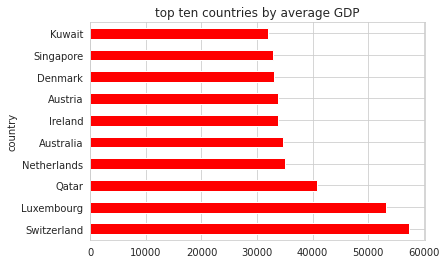

In [82]:
gdp_df=df.groupby("country")["gdp"].mean().sort_values(ascending = False)
gdp_df.iloc[0:10].plot.barh(x='country', y='gdp',
             title='top ten countries by average GDP', color='red')


>2.3. Sometimes it is useful to group datapoints that share certain common traits. That's what we'll do in this composite question. All the modifications to the dataframe suggested here must be ONLY for the questions 2.3. So we suggest to generate a new dataframe for this question, to avoid affecting the main one.

> 2.3.1 First, aggregate the data by country taking the mean of every numerical feature. At this point you should have 1 row per Country. Keep only the following features: `HIV/AIDS`,`Polio`,`Measles`,`Infant deaths`,`Hepatitis B`. (Remember, you might need the other features after question 2.3, so do not delete them from the main df)

In [83]:
mean_df = df.groupby(['country'])['hiv/aids', 'polio','measles','infantdeaths', 'hepatitisb'].mean()
mean_df.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,country,hiv/aids,polio,measles,infantdeaths,hepatitisb
0,Afghanistan,0.10000,48.3750,2362.2500,78.2500,64.562500
1,Albania,0.10000,98.1250,53.3750,0.6875,98.000000
2,Algeria,0.10000,91.7500,1943.8750,20.3125,78.000000
3,Angola,2.36875,46.1250,3561.3125,83.7500,70.222222
4,Antigua and Barbuda,0.12500,96.9375,0.0000,0.0000,98.266667
...,...,...,...,...,...,...
188,Venezuela (Bolivarian Republic of),0.10000,74.6875,165.0000,9.3750,66.250000
189,Viet Nam,0.14375,94.9375,4232.9375,29.1875,87.538462
190,Yemen,0.10000,67.1250,2761.1875,39.3750,55.687500
191,Zambia,11.93125,64.3750,6563.8125,33.4375,69.818182


> 2.3.2 Then, keep only the following columns, and AFTERWARDS drop all the rows that have NaN values : `HIV/AIDS`,`Polio`,`Measles`,`Infant deaths`,`Hepatitis B`. (Remember, you might need them after question 2.3, so do not delete them from the main df)

In [84]:
mean_df.dropna(inplace = True)
mean_df

,hiv/aids,polio,measles,infantdeaths,hepatitisb
country,,,,,
Afghanistan,0.10000,48.3750,2362.2500,78.2500,64.562500
Albania,0.10000,98.1250,53.3750,0.6875,98.000000
Algeria,0.10000,91.7500,1943.8750,20.3125,78.000000
Angola,2.36875,46.1250,3561.3125,83.7500,70.222222
Antigua and Barbuda,0.12500,96.9375,0.0000,0.0000,98.266667
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),0.10000,74.6875,165.0000,9.3750,66.250000
Viet Nam,0.14375,94.9375,4232.9375,29.1875,87.538462
Yemen,0.10000,67.1250,2761.1875,39.3750,55.687500


> 2.3.3 Then, build a new column in the dataset with a new composite index, the NHI (New Health Index). It integrates the situation of the country with regards to the HIV/AIDS, Polio, Measles, Infant deaths, Hepatitis B. The higher, the worse the situation. It needs to follow the following formula: $$BHI = 10*HIV + 2*Polio + \sqrt{Measles} + (Infant deaths)^{2} + Hepatitis B$$

In [85]:
mean_df['BHI']=10*mean_df['hiv/aids']+2*mean_df['polio']+np.sqrt(mean_df['measles'])+(mean_df['infantdeaths'])**2+mean_df['hepatitisb']

In [ ]:
mean_df.head()

,hiv/aids,polio,measles,infantdeaths,hepatitisb,BHI
country,,,,,,
Afghanistan,0.10000,48.3750,2362.2500,78.2500,64.562500,6333.977983
Albania,0.10000,98.1250,53.3750,0.6875,98.000000,303.028476
Algeria,0.10000,91.7500,1943.8750,20.3125,78.000000,719.187054
Angola,2.36875,46.1250,3561.3125,83.7500,70.222222,7259.898956
Antigua and Barbuda,0.12500,96.9375,0.0000,0.0000,98.266667,293.391667


> 2.3.4 After you added the column with the index, create another column, categorical, called "Health risk", which can have 4 different values:
* Very high risk
* High risk
* Medium risk
* Low risk
> You should assign the value to each row depening on the quartile the datapoint belongs to, following the NHI. If it is in the lowest 25%, it needs to be low risk, if it's between 25 and 50%, it will be Medium, between 50 and 75% High risk, between 75% and 100% Very high risk.
Hint: you may want to check the `qcut` function of Pandas.

> Finally, count the values of each class you created. How many datapoints are "High Risk"?

In [86]:
repartition=pd.qcut(mean_df['BHI'], [0, .25, .5, .75, 1.], ["Low risk", "Medium risk" , "High risk", "Very high risk"])
repartition.value_counts()

Low risk          46
Medium risk       46
High risk         46
Very high risk    46
Name: BHI, dtype: int64

>2.4 Compare GDP in 2002 and in 2012. Were there any countries that had a lower GDP with respect to 2002? If so, how many?

In [87]:
df_new = df[(df.year == 2002) | (df.year == 2012)]

df_new.groupby(['country']).apply(lambda x: x[x.year == 2012].gdp.iloc[0] < x[x.year ==  2002].gdp.iloc[0]).explode().sum()

24

>2.5 Generate a table with the average life expectancy by year for three different groups: 
>* for all developing countries
>* developed countries
>* the overall aggregated values.

>Then, plot the three trends in a line plot with the aggregated values for Life expectancy on y axis and the years on the x axis.


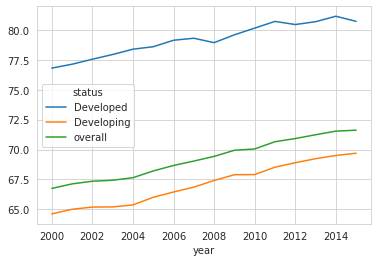

In [ ]:
# YOUR CODE HERE
# Generate the table
new_df = df.groupby(['status','year'])['lifeexpectancy'].mean().explode().reset_index()
new_df2 = df.groupby(['year'])['lifeexpectancy'].mean().explode().reset_index()
new_df2['status'] = 'overall'
new_df = pd.concat([new_df,new_df2]).reset_index()
pivot_df = new_df.pivot(index = 'year',columns = 'status',values='lifeexpectancy').reset_index()
# Plot
pivot_df.plot.line(x = 'year')

>2.6 Draw boxplots to compare the BMI (body mass index) between developed and developing countries. Before doing so, aggregate by country and average over time the BMI for each country. Remember to remove Nans. Do developed or developing have a higher median? Which has more outliers?

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


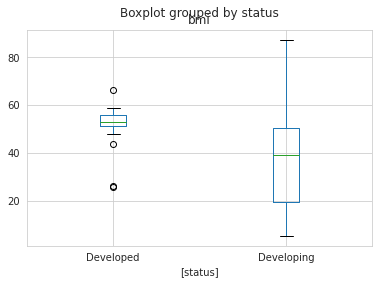

In [ ]:
bmi_df = df.groupby(['country','status'])['bmi'].mean().explode().reset_index().dropna()
bmi_df.boxplot( by = 'status')

Developed has the higher median and has more outliers than Developing

>2.7 Using `folium`, plot on an interactive map the life expectancy of the countries represented in the dataset. You need to have a scale of colors, the more intense the color, the higher the life expectancy of the country.
>
> Only include 2015 data.
>
>A separate geojson file with latitudes and longitudes of the countries needs to be downloaded from [here](https://datahub.io/core/geo-countries). You should use the `folium.Choropleth` method and give the geojson file as `geo_data` parameter. The `key_on` parameter should be set to `"feature.properties.ADMIN"` because of the structure of the json file. Make sure to drop any missing values before plotting your map.






In [ ]:
import folium
geo = "countries.geojson"
# YOUR CODE HERE

## Before regression: One Hot Encoding

Before moving on to the regression, we need to transform the categorical variables as dummy variables for the regression. In order to do so, we use a [One Hot Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Pay attention: we need to consider "year" as a categorical variable as well, as it is not a continuous one. So the two features that you need to encode are: Year and Status. Add the features to the dataset. 
Reminder: when encoding n categories, we need to add n-1 features to avoid multicollinearity - the "Dummy variable trap".

>2.8 How many features does the dataframe have now, after adding n-1 columns for year and m-1 for status, where n and m are respectively the number of categories possible?

In [124]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# YOUR CODE HERE


## 3. Regression Analysis
### 3.1 Intro to regression

For this section we will try to build a model to predict the life expectancy, given other data regarding a country. Here we are providing the cleaned dataframe for you. The regression dataset is the same you've been working on until now with some additional cleaning. The features available are the following:
* Alcohol
* Schooling
* GDP
* Life expectancy
* Percentage expenditure
* One dummy feature for each year except for 1 (2000,2001,2002,...)
* One dummy feature "Developing" indicating whether the country is a developing one or not

>Load the data.

In [131]:
#Upload the data
new_data = pd.read_csv("Regression Analysis Data")

In [24]:
# YOUR CODE HERE
new_data.describe()

,Year,Life expectancy,Alcohol,Percentage expenditure,Gdp,Population,Schooling,2000,2001,2002,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Developing
count,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2.117000e+03,2117.000000,2117.000000,2117.000000,2117.000000,...,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000,2117.000000
mean,2007.004251,68.629003,4.712300,897.159420,6678.433958,1.296805e+07,11.883562,0.066131,0.066604,0.066604,...,0.067076,0.067076,0.066604,0.066604,0.066604,0.066604,0.066131,0.066131,0.066131,0.815305
std,4.321822,9.874433,4.048895,2236.390076,13754.819775,6.294690e+07,3.353225,0.248570,0.249393,0.249393,...,0.250213,0.250213,0.249393,0.249393,0.249393,0.249393,0.248570,0.248570,0.248570,0.388142
min,2000.000000,36.300000,0.010000,0.000000,1.681350,3.400000e+01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,62.100000,0.970000,31.594159,418.292176,1.923120e+05,9.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2007.000000,71.400000,4.080000,126.698109,1461.671957,1.354775e+06,12.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2011.000000,75.400000,7.560000,549.809610,4981.198619,7.295394e+06,14.300000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2015.000000,89.000000,17.870000,19479.911610,119172.741800,1.293859e+09,20.700000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


>3.1.2. Plot the distribution of life expectancy in 2000 and in 2012. Then create a new column equal to the natural logarithm of life expectancy and plot its histogram as well, just for year 2000.

In [63]:
new_data.head(100)

,Country,Life expectancy,Alcohol,Percentage expenditure,Gdp,Population,Schooling,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,Developing,logarithm of life expectancy
0,Afghanistan,65.0,0.01,71.279624,584.259210,33736494.0,10.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.812913
1,Afghanistan,59.9,0.01,73.523582,612.696514,327582.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.777427
2,Afghanistan,59.9,0.01,73.219243,631.744976,31731688.0,9.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.777427
3,Afghanistan,59.5,0.01,78.184215,669.959000,3696958.0,9.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.774517
4,Afghanistan,59.2,0.01,7.097109,63.537231,2978599.0,9.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.772322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Australia,82.0,10.30,10986.265270,62245.129000,223424.0,19.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.913814
96,Australia,81.9,10.52,8875.786493,51874.848000,223175.0,19.5,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.913284
97,Australia,81.7,10.62,7172.275229,42742.998980,216917.0,19.1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.912222
98,Australia,81.3,10.76,8547.292357,49664.685400,212492.0,19.1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.910091


In [52]:
new_data1.head()

,Country,Year,Life expectancy,Alcohol,Percentage expenditure,Gdp,Population,Schooling,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,Developing,logarithm of life expectancy
3,Afghanistan,2012,59.5,0.01,78.184215,669.959000,3696958.0,9.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.774517
15,Afghanistan,2000,54.8,0.01,10.424960,114.560000,293756.0,5.5,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.738781
19,Albania,2012,76.9,5.14,412.443356,4247.614380,2941.0,14.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.885926
31,Albania,2000,72.6,3.66,91.711541,1175.788981,38927.0,10.7,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.860937
34,Algeria,2012,75.1,0.66,555.926083,5564.825660,37565847.0,14.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.875640


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f448e57f210>,
      dtype=object)

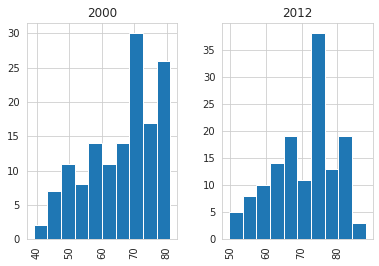

In [48]:
# YOUR CODE HERE
new_data1=new_data[(new_data.Year == 2000) | (new_data.Year == 2012)]

new_data1.hist(column="Life expectancy",by='Year',)


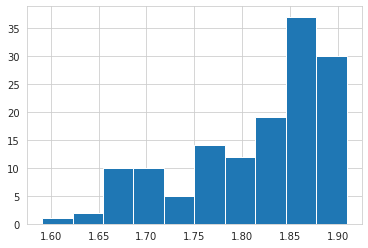

In [132]:
# YOUR CODE HERE
#Add the new column with the log
new_data['logarithm of life expectancy'] = np.log10(new_data['Life expectancy'])
#Generate the second histogram: 2000, but with the log
new_data['logarithm of life expectancy'][(new_data.Year == 2000)].hist()


>3.1.3. Create 3 pairplots with the log of life expectancy on the horizontal axis and on the vertical axis GDP, population, schooling. Which seems to be the best predictor?


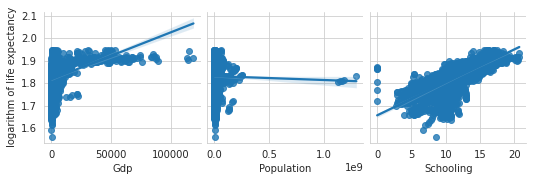

In [60]:
import seaborn
seaborn.pairplot(new_data,kind="reg", y_vars="logarithm of life expectancy",x_vars=["Gdp","Population","Schooling"])

Schooling seems be the best predictor

## 3.2 Simple Linear Regression

>3.2.1 Drop the feature "Year", since we have hot-encoded it. Regress, using the library `sklearn`, log of life expectancy on Alcohol, gdp, population, percentage expenditure, schooling, Developing, and all the dummy variables for the years.
> 
>Select the dependent (y) and the independent variables (X).

In [133]:
new_data=new_data.drop(columns="Year")
X=nd["Gdp","Percentage expenditure","logarithm of life expectancy"]
y=nd["Population","Schooling","Developing"]

NameError: ignored

>3.2.2 Split your dataset into a training set (80%) and a test set (20%). Use sklearn.model_selection.train_test_split() and set the **random_state to 42.**

In [130]:
# YOUR CODE HERE
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(X,y, test size=0.2, train_size=0.8,random_state=42)

SyntaxError: ignored

>3.2.3 Train a linear regression model on the training data. What is the R^2 score for the test data?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
model=LinearRegression()
model.fit(X,y)
predicted_values=model.predict(X)
r2=r2_score(y,predicted_values)

print("R¨2%.2f"% r2)


>3.2.4. Predict what would be the life expectancy of a (very small) country with an Alcohol consumption of 5 liters, GDP per capita of 800 dollars, a population of 300 individuals, 62 as percentage expenditure, 8 as schooling in year 2000. It is not a developing country.

In [ ]:
# YOUR CODE HERE

## 3.3 Linear Regression with Standardization

> 3.3.1. Apply a standard scaler to the following columns: Alcohol, gdp, population, percentage expenditure, schooling
> 
> Hint: use the scaler on the already split data. Fit-transform the scaler on X_train and apply transform on X_test.

In [ ]:
# YOUR CODE HERE

> 3.3.2 Train a linear regression model with the standardised data. What is the R^2 score for the test data?

In [ ]:
# YOUR CODE HERE


> 3.3.3 With the new model, predict, as before, what would be the life expectancy of a (very small) country with an Alcohol consumption of 5 liters, GDP per capita of 800 dollars, a population of 300 individuals, 62 as percentage expenditure, 8 as schooling in year 2000. It is not a developing country.

In [ ]:
# YOUR CODE HERE

>3.3.4 Looking at the coefficients from the linear regression with standardization, identify which variable is the one with the strongest impact on the dependent variable.

In [ ]:
# YOUR CODE HERE

> 3.3.5 Calculate the adjusted R-squared and identify the optimum regression coefficients using linear regression with standardisation. 
>
> Hint: calculate the adjusted R-squared for the full model with linear regression and standardisation (as above). The try dropping either one of the columns: `GDP`, `Population` and all the year features and recalculate adjusted R-squared for every new model. Identify which combination of features gives the highest adjusted R-squared. 
>
>Check out this documentation file on the [adjusted R-squared](https://www.statology.org/adjusted-r-squared-in-python/).
>
> Remember to use 42 as the **random_state**

In [ ]:
# YOUR CODE HERE


>3.3.6 Train the model when you drop `GDP` and calculate the adjusted R-squared.

In [ ]:
# YOUR CODE HERE

> 3.3.7 Train the model when you drop `Population` and calculate the adjusted R-squared. Pay attention: you only need to drop `Population`, you need `GDP` back in there.

In [ ]:
# YOUR CODE HERE

>3.3.8 Train the model when you drop all the year features and calculate the adjusted R-squared. Pay attention: you only need to drop all the year features, you need `GDP` and `Population` back in there. 

In [ ]:
# YOUR CODE HERE